### Is sequentialness preserved across a half-half split of the data?


In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.belief_partitions.belief_partition_configs import *
import scripts.pseudo_decoding.belief_partitions.belief_partitions_io as belief_partitions_io

import scipy
import argparse
import copy

### Helper functions:

In [2]:
def plot_weights(args, region_level="structure_level2"):
    stim_conts, fb_conts, all_conts = belief_partitions_io.get_contributions_for_all_time(args, region_level=region_level)
    peaks, orders = spike_utils.find_peaks(all_conts, value_col="mean_cont", time_col="abs_time", region_level=region_level)
    _, _ = visualization_utils.plot_pop_heatmap_by_time(stim_conts, fb_conts, all_conts, value_col="mean_cont", region_level=region_level, orders=orders)

def plot_for_both_runs(args, region_level="structure_level2"):
    stim_conts, fb_conts, all_conts = belief_partitions_io.get_contributions_for_all_time(args, region_level=region_level, run_idx=0)
    _, run_0_orders = spike_utils.find_peaks(all_conts, value_col="mean_cont", time_col="abs_time", region_level=region_level)
    _, _ = visualization_utils.plot_pop_heatmap_by_time(stim_conts, fb_conts, all_conts, value_col="mean_cont", region_level=region_level, orders=run_0_orders)

    stim_conts, fb_conts, all_conts = belief_partitions_io.get_contributions_for_all_time(args, region_level=region_level, run_idx=1)
    _, _ = visualization_utils.plot_pop_heatmap_by_time(stim_conts, fb_conts, all_conts, value_col="mean_cont", region_level=region_level, orders=run_0_orders)

## SA

### Load data, make sure decoder still decodes

['CIRCLE' 'SQUARE' 'STAR' 'TRIANGLE' 'CYAN' 'GREEN' 'MAGENTA' 'YELLOW'
 'ESCHER' 'POLKADOT' 'RIPPLE' 'SWIRL']


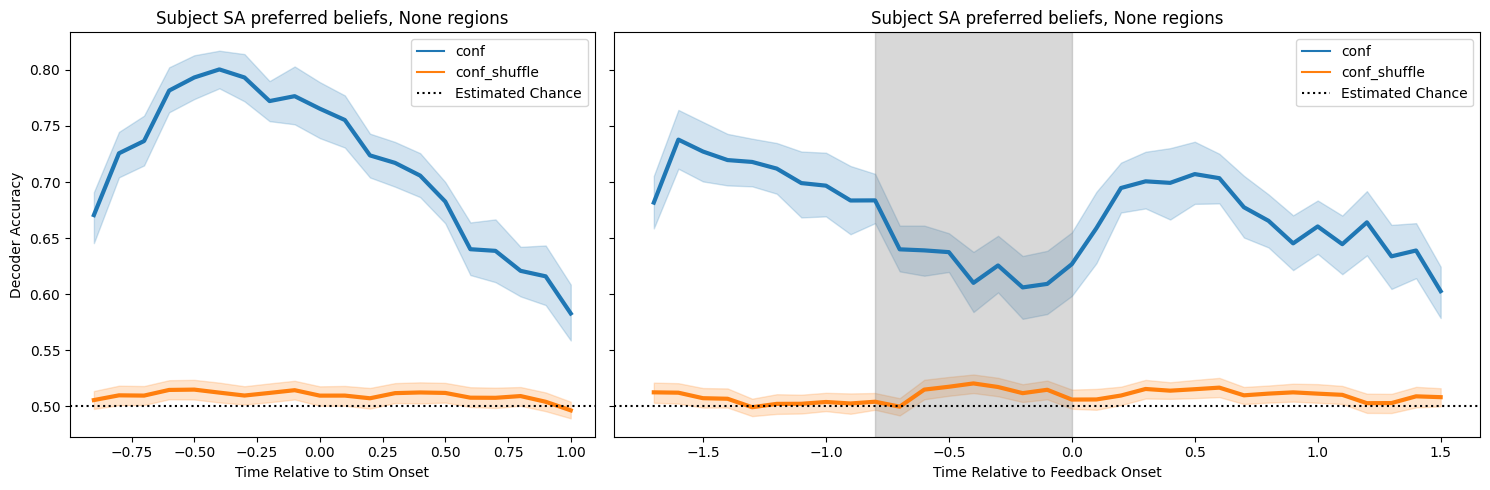

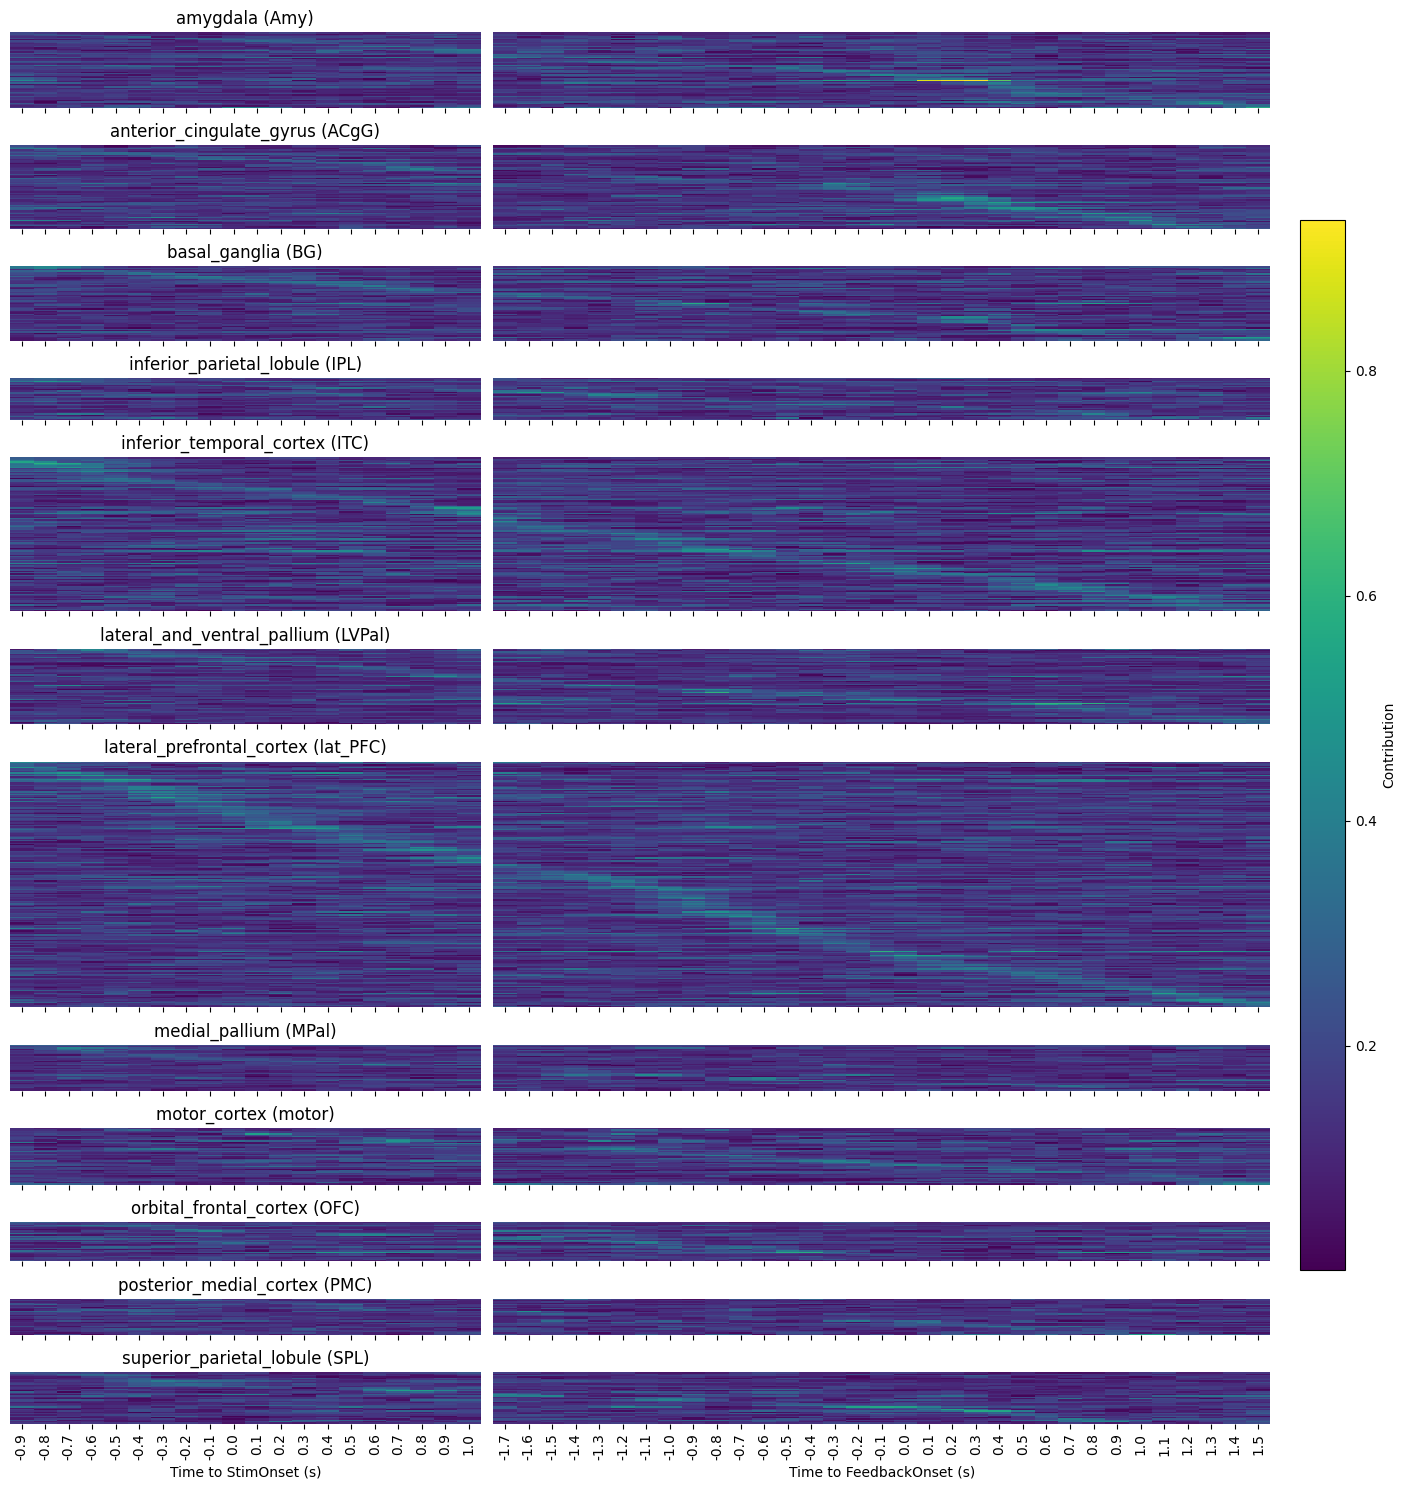

In [3]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.subject = "SA"
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "conf"
args.sig_unit_level = "belief_partition_all_time_95th"
args.splitter = "kfold"
args.num_splits = 2

visualization_utils.plot_combined_accs(args)
plot_weights(args, region_level="structure_level2")


### Now only load from one run, see whether ordering is preserved on the other run: 

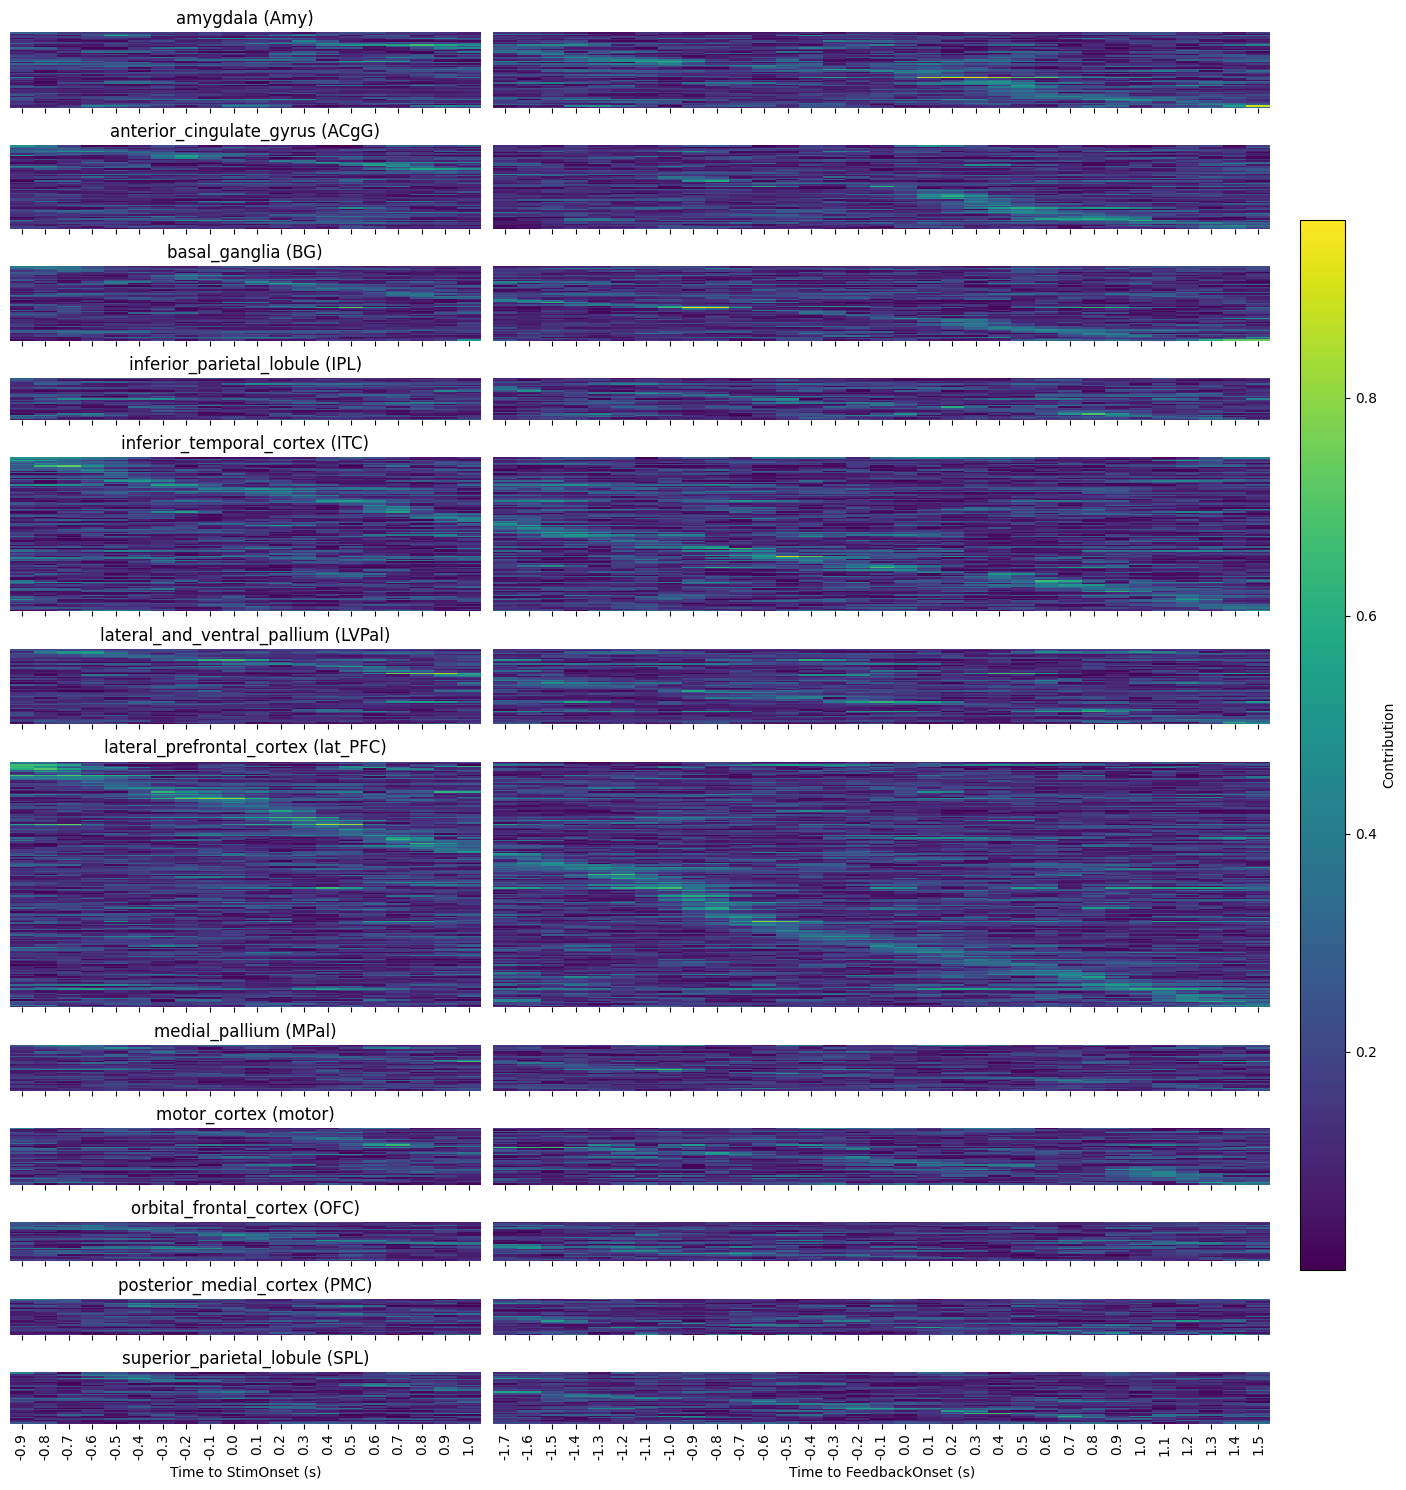

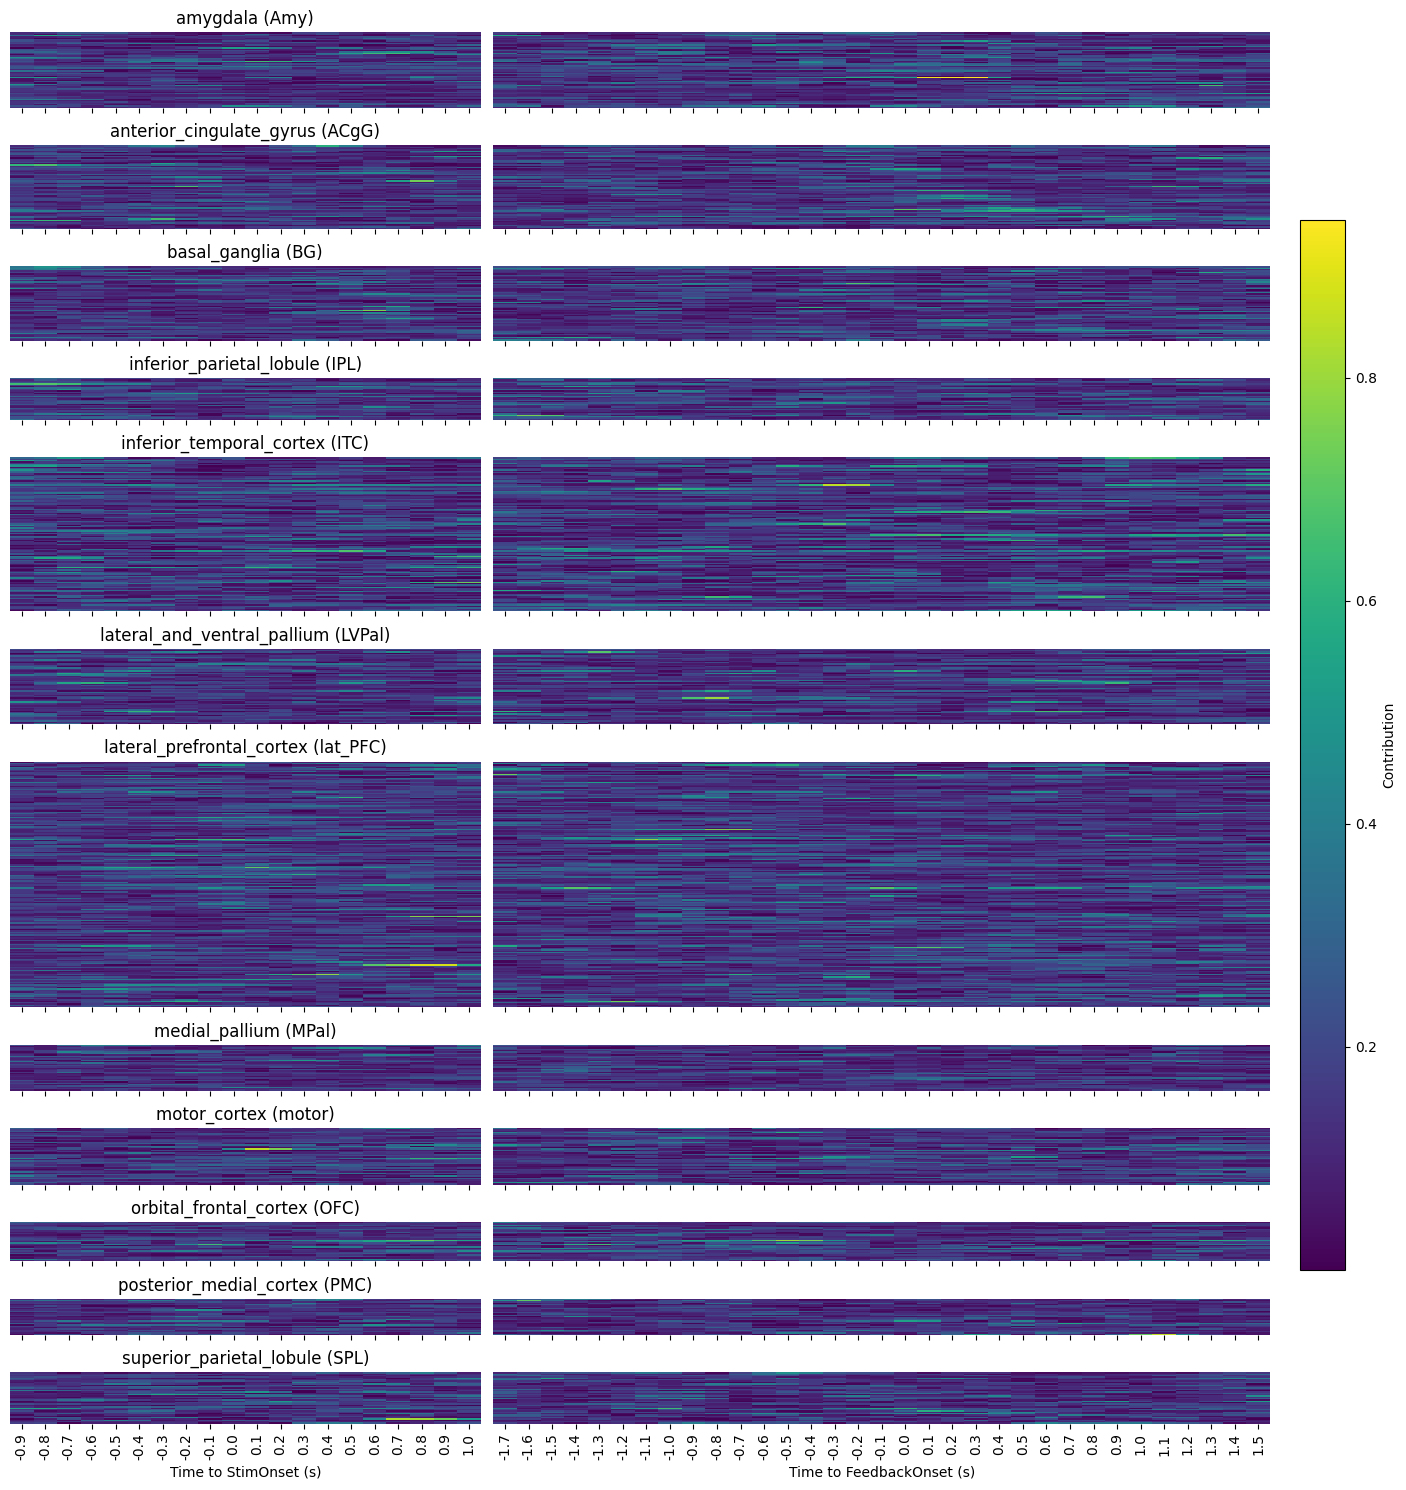

In [4]:
plot_for_both_runs(args)

### See if peak times are at least correlated:

Text(0.5, 1.0, 'conf: r: 0.16985516825422423, p: 2.0718214884018153e-06')

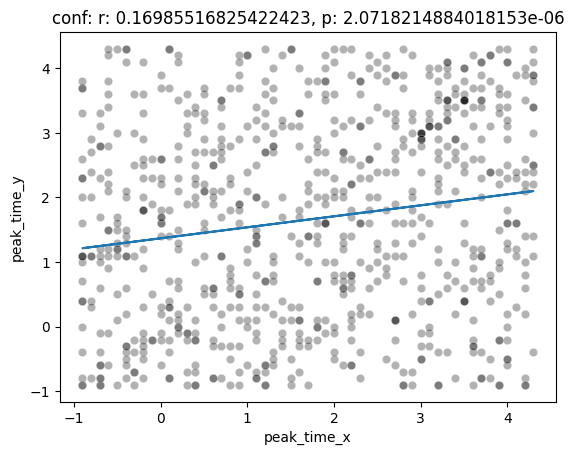

In [5]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.subject = "SA"
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "conf"
args.sig_unit_level = "belief_partition_all_time_95th"
args.splitter = "kfold"
args.num_splits = 2

stim_conts, fb_conts, all_conts = belief_partitions_io.get_contributions_for_all_time(args, region_level="whole_pop", run_idx=0)
run_0_peaks, run_0_orders = spike_utils.find_peaks(all_conts, value_col="mean_cont", time_col="abs_time")

stim_conts, fb_conts, all_conts = belief_partitions_io.get_contributions_for_all_time(args, region_level="whole_pop", run_idx=1)
run_1_peaks, run_1_orders = spike_utils.find_peaks(all_conts, value_col="mean_cont", time_col="abs_time")

peak_times = pd.merge(run_0_peaks["all_regions"], run_1_peaks["all_regions"], on=["PseudoUnitID"])

fig, ax = plt.subplots()
slope, intercept, r_value, p_value, std_err = visualization_utils.sns_plot_correlation(peak_times, x_col="peak_time_x", y_col="peak_time_y", ax=ax)
ax.set_title(f"{args.mode}: r: {r_value}, p: {p_value}")



### Looks like ordering is not preserved across kfold. Is ordering even preserved during random 80/20 splits?

Warning, shuffle not found: MAGENTA_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_6
Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9
['CIRCLE' 'SQUARE' 'STAR' 'TRIANGLE' 'CYAN' 'GREEN' 'MAGENTA' 'YELLOW'
 'ESCHER' 'POLKADOT' 'RIPPLE' 'SWIRL']
Warning, shuffle not found: MAGENTA_pref_shuffle_0
Warning, shuffle not found: MAGENTA_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_6
Warning, shuffle not found: MAGENTA_pref_shuffle_7
Warning, shuffle not found: MAGENTA_pref_shuffle_9
Warning, shuffle not found: RIPPLE_pref_shuffle_9


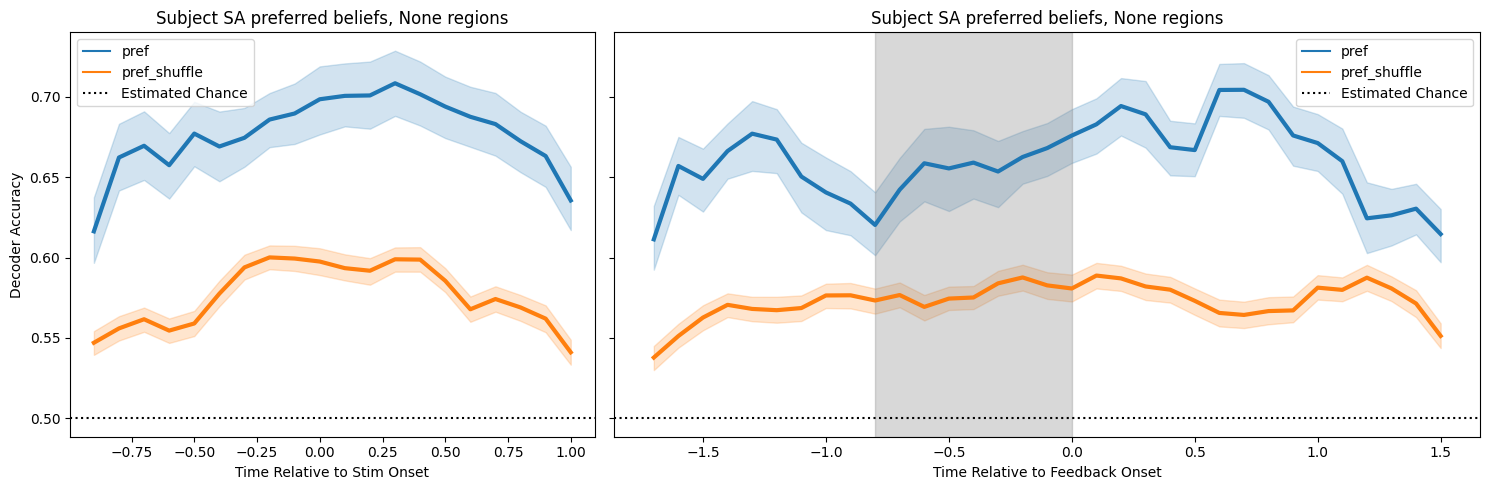

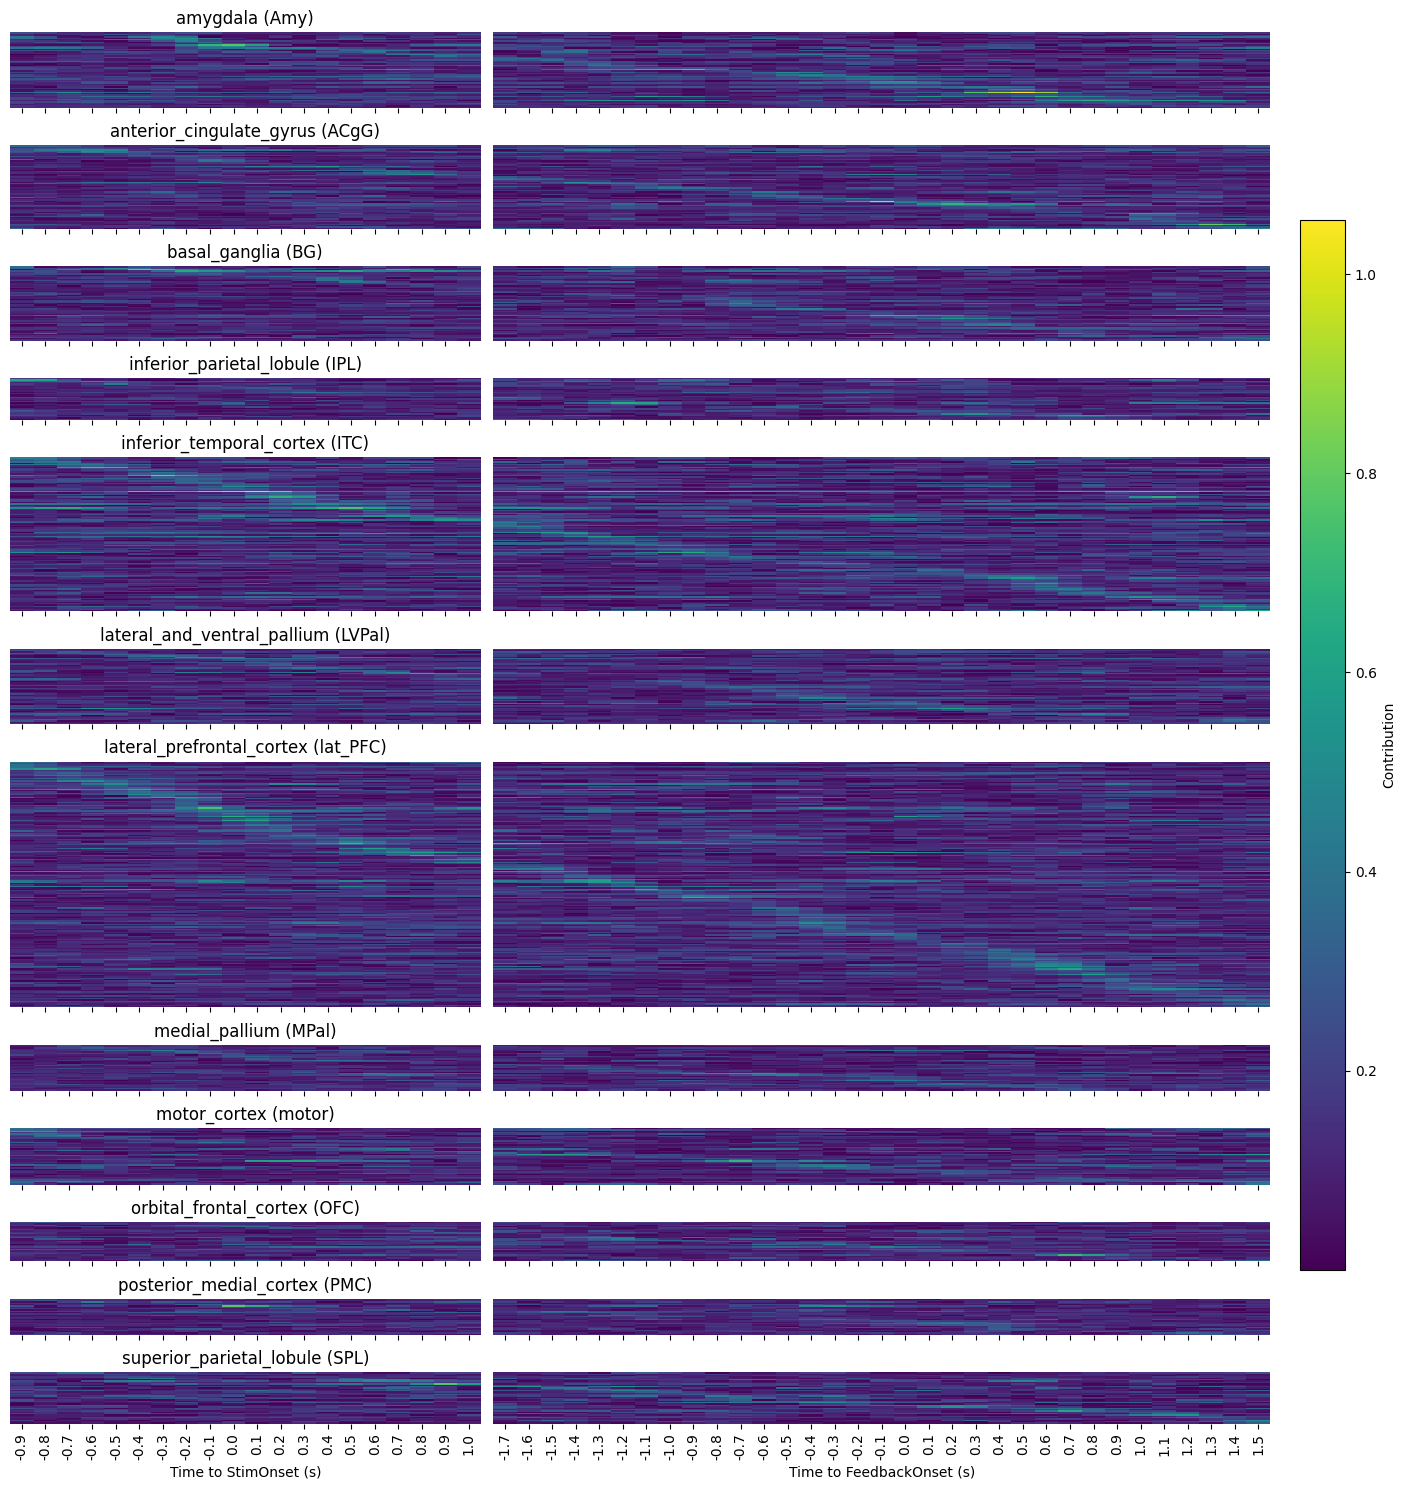

In [4]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.subject = "SA"
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "pref"
args.sig_unit_level = "belief_partition_all_time_95th"
# args.splitter = "kfold"
# args.num_splits = 2

visualization_utils.plot_combined_accs(args)
order = visualization_utils.plot_weights(args, region_level="structure_level2", run_idx=0)


{'amygdala (Amy)': 41        2018091926
 12        2018082016
 22        2018083021
 5         2018080342
 34        2018090724
 31        2018090702
 19        2018082816
 50        2018100124
 27        2018090626
 16        2018082118
 14        2018082116
 43        2018092103
 20        2018082820
 13        2018082017
 23        2018090401
 3         2018080238
 51        2018100318
 24        2018090402
 36        2018091025
 53        2018100820
 38        2018091801
 46        2018092424
 42        2018092017
 54    20180725000105
 21        2018082924
 17        2018082219
 39        2018091830
 47        2018092527
 29        2018090634
 10        2018081722
 11        2018082015
 2         2018080208
 37        2018091205
 7         2018080817
 35        2018090725
 26        2018090526
 25        2018090525
 52        2018100516
 0         2018070501
 28        2018090632
 18        2018082222
 45        2018092423
 55    20180725000135
 6         2018080630
 49        201

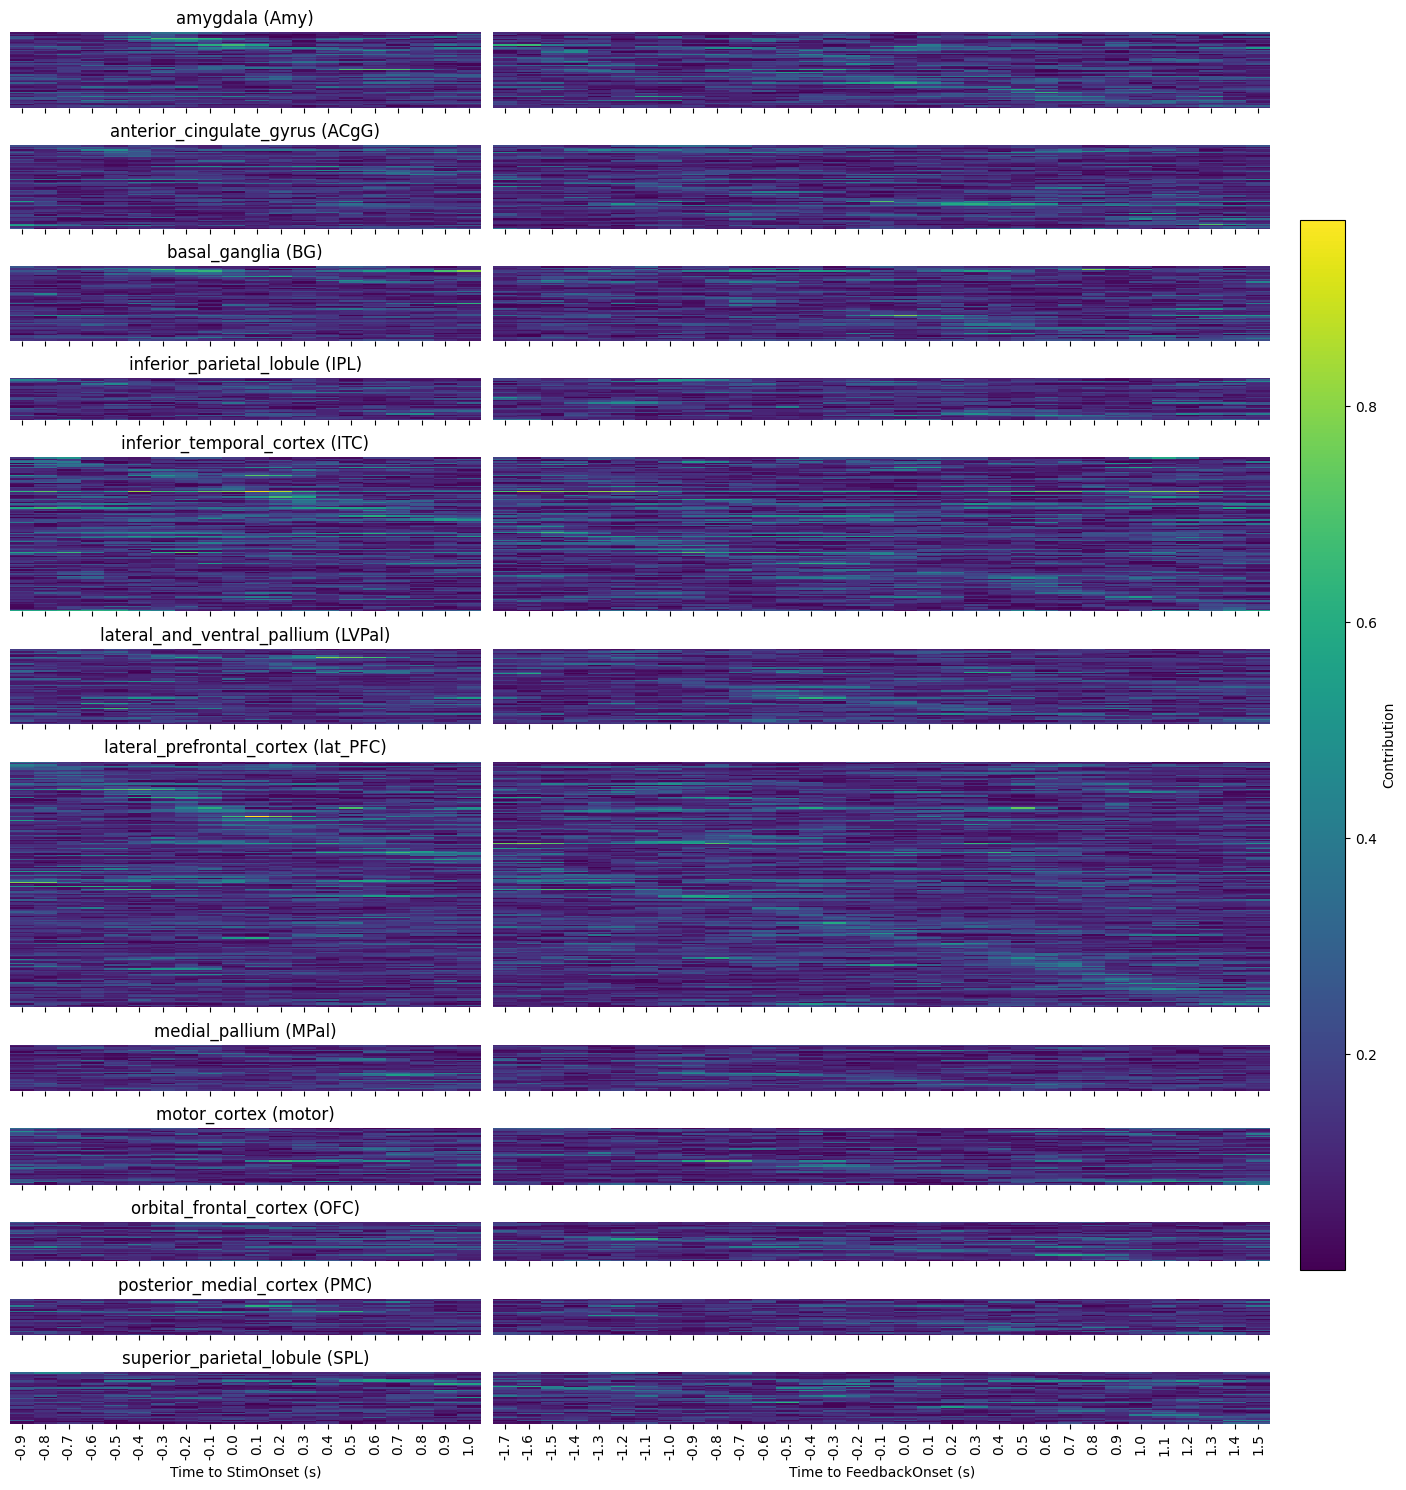

In [5]:
visualization_utils.plot_weights(args, region_level="structure_level2", unit_orders=order, run_idx=1)
